In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import scipy.stats as spt
 import statsmodels as sms
 import statsmodels.formula.api as smf
 import seaborn as sns
 from statsmodels.tsa.stattools import acf, pacf
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 from cycler import cycler
 plt.rcParams['xtick.labelsize'] = 12
 plt.rcParams['ytick.labelsize'] = 12
 plt.rcParams["axes.labelsize"]= 12
 plt.rcParams["figure.facecolor"] = "#f2f2f2"
 #plt.rcParams['figure.savefig.dpi'] = 100
 plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
 plt.rcParams['savefig.facecolor'] ="#f2f2f2"
 plt.rcParams["figure.figsize"] = [16,10]
 plt.rcParams['savefig.bbox'] = "tight"
 plt.rcParams['font.size'] = 14
 greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
 multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
 plt.rcParams["axes.prop_cycle"] = cycler(color=multi)

* Housing type x
* Størrelse vs pris x
* Byggeår vs pris x 
* Pris, median, max og min x
* Medianpris for hver postkode x
    * Kanskje legge til i et kart 


In [217]:
df = pd.read_csv('../Felles/TrondheimHousingDataCleaned.csv')

In [218]:
df.head()

,Matrikkel / Org-Anr,Address,Housing type,Primary room,Usable area,Gross area,Year of construction,Floor,Plot size,Last sold,...,Broker,Postal code,Area name,Days since first sold,Broker encoded,Housing type encoded,Balcony_Yes,Parking_Yes,Lat,Lon
0,5001-20/88/0/0,"Skogvegen 32, 7058 CHARLOTTENLUND",Selveier enebolig,441,517,567,2007.0,0,970.8,2021-02-28,...,Eiendomsmegler 1,7058,CHARLOTTENLUND,0,3,4,0,0,63.4239,10.4927
1,5001-410/683/0/34,"Dyre Halses gate 11, 7042 TRONDHEIM",Selveierleilighet,55,55,60,2004.0,7,1043.2,2021-03-01,...,DNB Eiendom,7042,TRONDHEIM,1,1,7,1,0,63.4364,10.4134
2,5001-404/418/0/69,"Tellefsens gate 8, 7030 TRONDHEIM",Selveierleilighet,135,144,144,2019.0,5,3673.0,2021-03-01,...,Eiendomsmegler 1,7030,TRONDHEIM,1,3,7,1,0,63.4206,10.3973
3,5001-52/224/0/128,"Heggdalsringen 65, 7049 TRONDHEIM",Selveierleilighet,69,73,73,2019.0,5,4572.6,2021-03-01,...,Other,7049,TRONDHEIM,1,8,7,0,0,63.4044,10.4535
4,5001-76/267/0/15,"Siriusvegen 10 A, 7037 TRONDHEIM",Selveierleilighet,74,74,81,1995.0,3,9300.8,2021-03-01,...,Eiendomsmegler 1,7037,TRONDHEIM,1,3,7,1,0,63.3941,10.4113


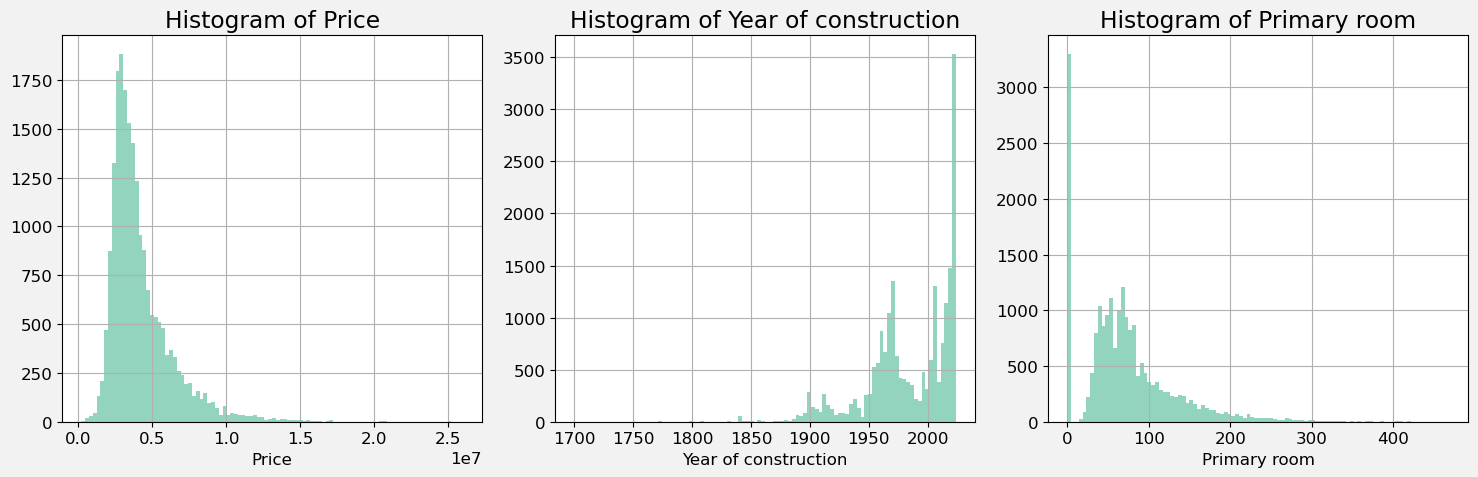

In [100]:
# Histograms of Price, Year of construction and Primary room
hist_var = df[['Price', 'Year of construction', 'Primary room']]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Creating histograms for each variable
hist_var['Price'].hist(bins=100, alpha=0.7, ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')

hist_var['Year of construction'].hist(bins=100, alpha=0.7, ax=axes[1])
axes[1].set_title('Histogram of Year of construction')
axes[1].set_xlabel('Year of construction')

hist_var['Primary room'].hist(bins=100, alpha=0.7, ax=axes[2])
axes[2].set_title('Histogram of Primary room')
axes[2].set_xlabel('Primary room')

plt.tight_layout()
plt.show()


In [99]:
df['Housing type'].value_counts()

Housing type
Selveierleilighet          9590
Borettslagsleilighet       5670
Selveier enebolig          2229
Selveier tomannsbolig      1409
Selveier rekkehus          1184
Borettslag rekkehus         424
Borettslag tomannsbolig      63
Borettslag enebolig          19
Name: count, dtype: int64

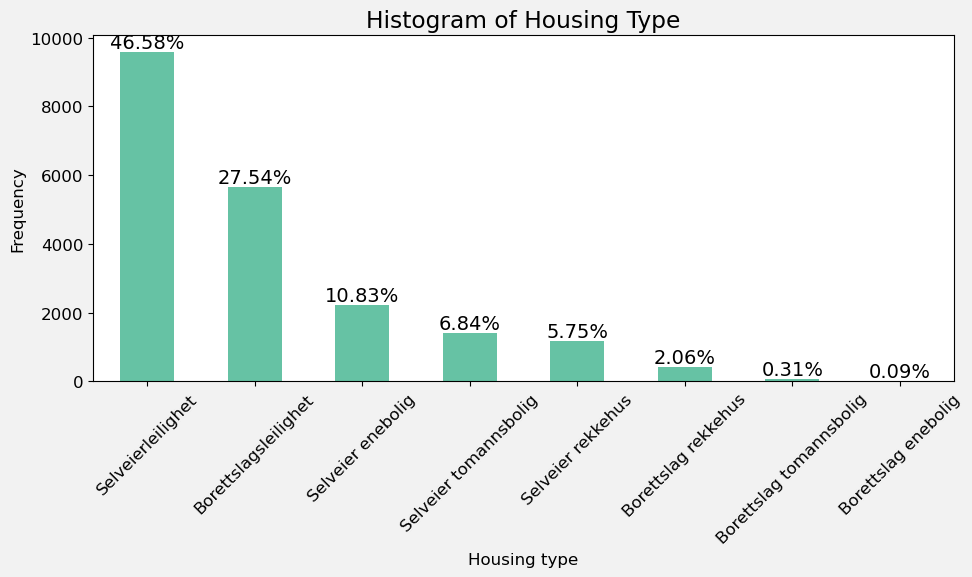

In [211]:
plt.figure(figsize=(10, 6)) 

housing_type_counts = df['Housing type'].value_counts()
total_count = housing_type_counts.sum()

# Plot histogram
housing_type_counts.plot(kind='bar')
plt.title('Histogram of Housing Type')
plt.ylabel('Frequency')

# Rotate x-axis
plt.xticks(rotation=45)

# Calculate and display percentage labels
for i, count in enumerate(housing_type_counts):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout() 
plt.show()


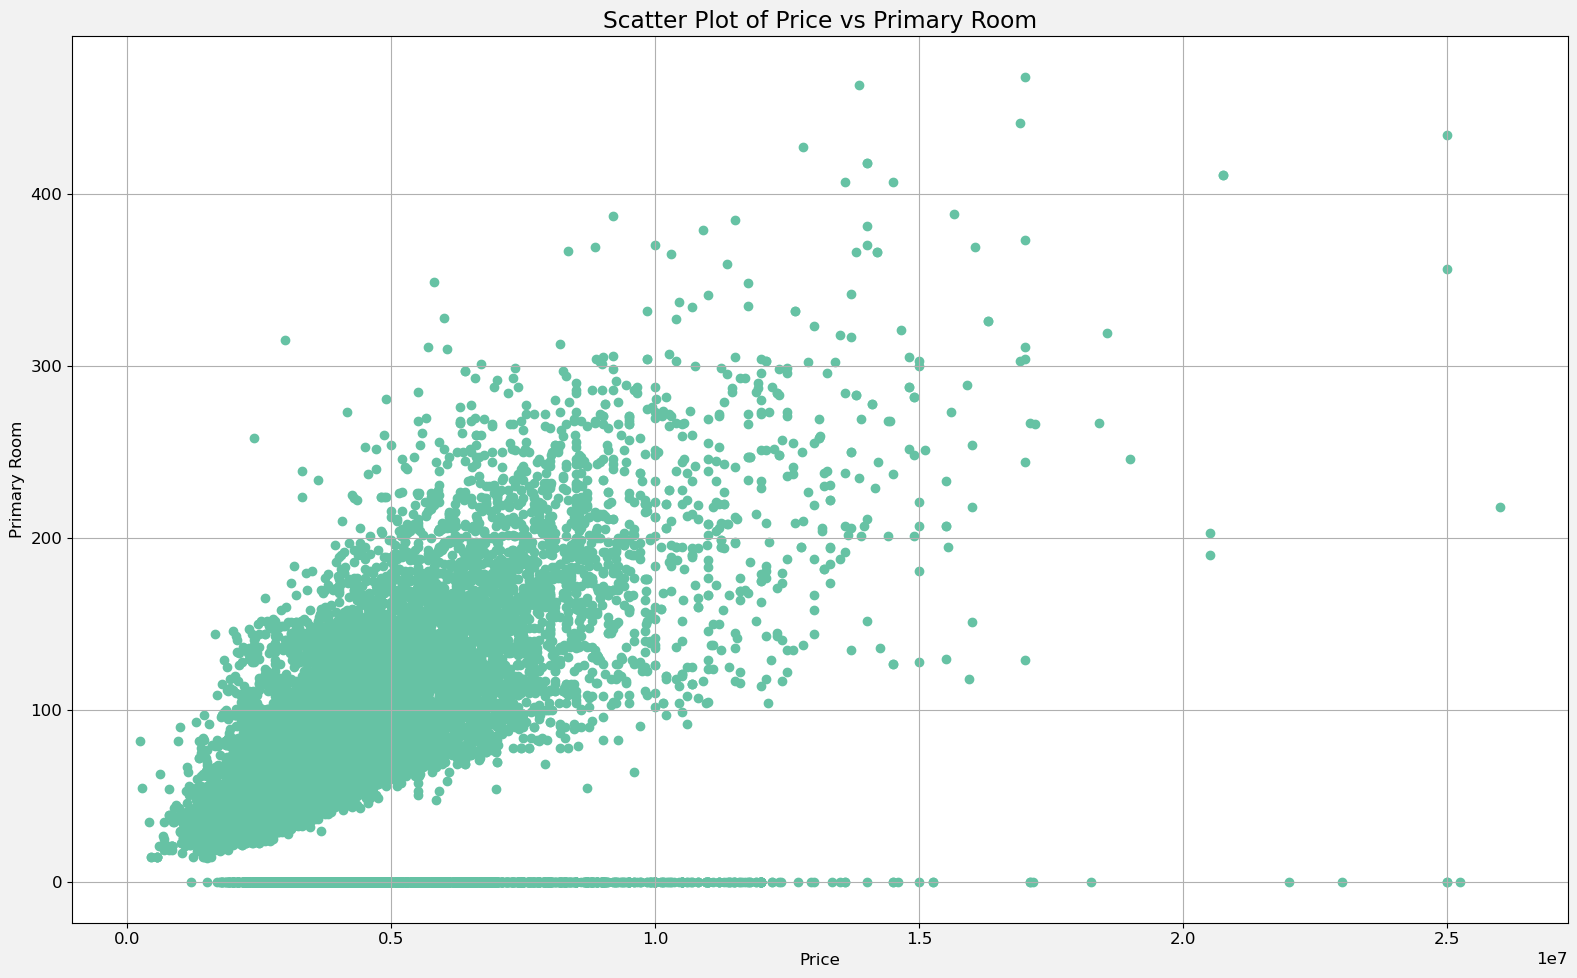

In [102]:
# Price against Primary room
plt.figure(figsize=(16, 10))  # Adjust figure size as needed

# Scatter plot
plt.scatter(df['Price'], df['Primary room'])

# Adding labels and title
plt.title('Scatter Plot of Price vs Primary Room')
plt.xlabel('Price')
plt.ylabel('Primary Room')

# Show plot
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()


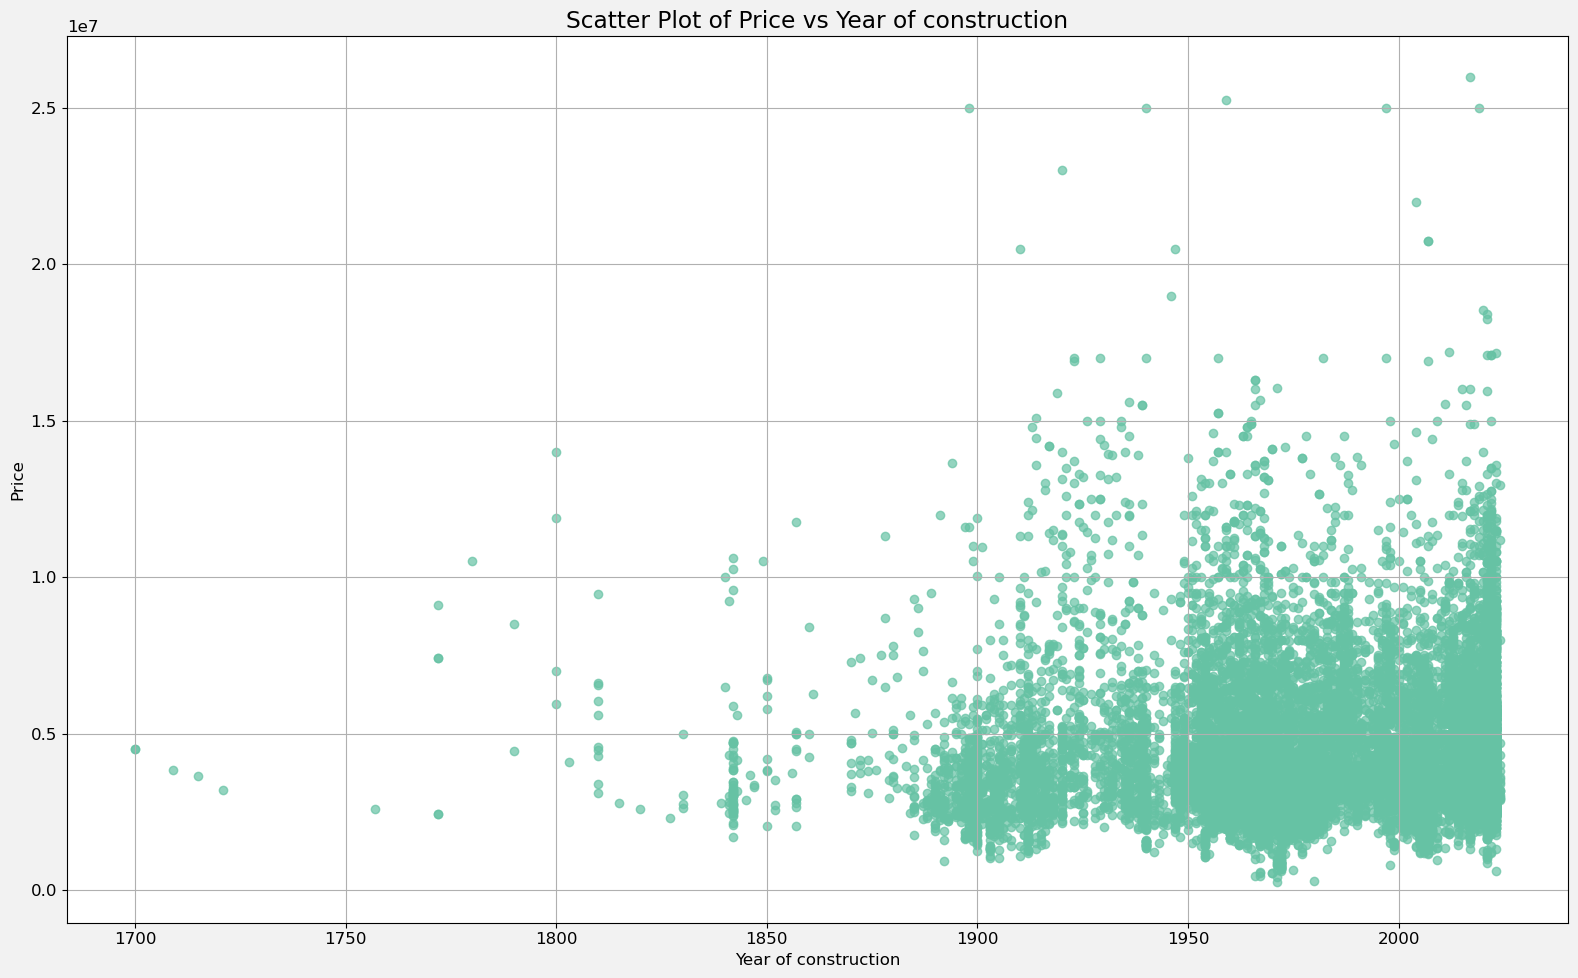

In [103]:
# Price against Year of construction
plt.figure(figsize=(16, 10))

# Scatter plot
plt.scatter(df['Year of construction'],df['Price'], alpha = 0.7)

# Adding labels and title
plt.title('Scatter Plot of Price vs Year of construction')
plt.ylabel('Price')
plt.xlabel('Year of construction')

# Show plot
plt.grid(True) 
plt.tight_layout()  
plt.show()


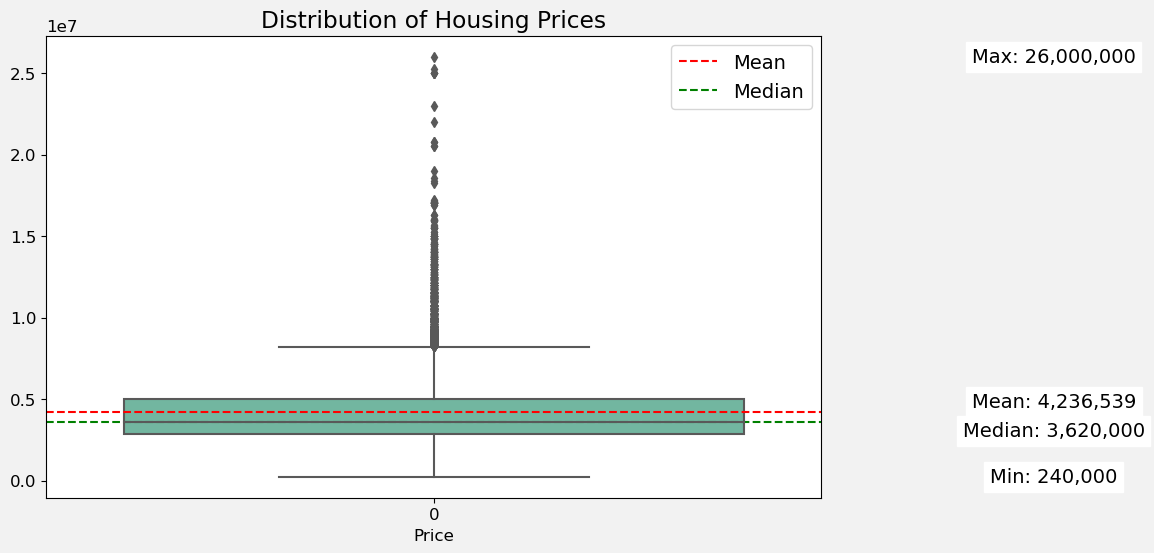

In [104]:
# Boxplot of the distribution of housing prices
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(data=df['Price'])

# Add mean, median, min, and max annotations
plt.axhline(y=df['Price'].mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=df['Price'].median(), color='g', linestyle='--', label='Median')
plt.text(0.8, df['Price'].mean(), f"Mean: {'{:,.0f}'.format(df['Price'].mean())}", va='bottom', ha='center', backgroundcolor='w')
plt.text(0.8, df['Price'].median(), f"Median: {'{:,.0f}'.format(df['Price'].median())}", va='top', ha='center', backgroundcolor='w')
plt.text(0.8, df['Price'].min(), f"Min: {'{:,.0f}'.format(df['Price'].min())}", va='center', ha='center', backgroundcolor='w')
plt.text(0.8, df['Price'].max(), f"Max: {'{:,.0f}'.format(df['Price'].max())}", va='center', ha='center', backgroundcolor='w')

# Add labels and title
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('')

plt.legend()
plt.show()

In [216]:
# How many residences under the max price for a civil economist
total_count = len(df)
count_under = df[df['Price'] < 5750000]['Price'].count()

percentage_under = (count_under / total_count) * 100

print("Percentage of variables under 5,750,000:", f"{percentage_under:.2f}%")


Percentage of variables under 5,750,000: 82.24%


In [105]:
total_count = len(df)
count_under_9m = df[df['Price'] < 9000000]['Price'].count()

percentage_under_9m = (count_under_9m / total_count) * 100

print("Percentage of variables under 9,000,000:", percentage_under_9m)


Percentage of variables under 9,000,000: 96.29881484359821


In [106]:
# Median price for each postal code
# Assuming 'df' is your DataFrame and 'Price' is the column containing housing prices
median_prices = df.groupby('Postal code')['Price'].median().reset_index()

print("Median Price for Each Postal code:")
median_prices


Median Price for Each Postal code:


,Postal code,Price
0,7010,3000000.0
1,7011,2380000.0
2,7012,3250000.0
3,7013,3690000.0
4,7014,3740000.0
...,...,...
69,7097,3590000.0
70,7098,2520000.0
71,7099,2850000.0
72,7540,3790000.0


In [107]:
median_prices_sorted = df.groupby('Postal code')['Price'].median().reset_index()
median_prices_sorted = median_prices_sorted.sort_values(by='Price', ascending=False)
median_prices_sorted.reset_index(drop = True, inplace = True)

print("Median Price for Each Postal Code (Sorted from Highest to Lowest):")
print(median_prices_sorted)


Median Price for Each Postal Code (Sorted from Highest to Lowest):
    Postal code      Price
0          7051  7150000.0
1          7059  6995000.0
2          7025  6525000.0
3          7060  6410000.0
4          7071  6295000.0
..          ...        ...
69         7067  2850000.0
70         7029  2525000.0
71         7098  2520000.0
72         7011  2380000.0
73         7082  2315000.0

[74 rows x 2 columns]


In [108]:
median_prices_sorted[median_prices_sorted['Postal code']==7030]

,Postal code,Price
27,7030,3950000.0


In [110]:
df.columns

Index(['Matrikkel / Org-Anr', 'Address', 'Housing type', 'Primary room',
       'Usable area', 'Gross area', 'Year of construction', 'Floor',
       'Plot size', 'Last sold', 'Price', 'Joint debt at last sale',
       'Total price at last sale', 'Number of rooms', 'Number of bedrooms',
       'Registered date', 'Turnover rate', 'Broker', 'Postal code',
       'Area name', 'Broker encoded', 'Housing type encoded', 'Balcony_Yes',
       'Parking_Yes', 'Lat', 'Lon'],
      dtype='object')

In [109]:
import plotly.express as px

In [117]:
center_lat = df['Lat'].mean()
center_lon = df['Lon'].mean()
print(center_lat, center_lon)

63.407553128521464 10.411292702059452


In [189]:
# Made a new dataframe to use when plotting heatmap over map
map_df = df[['Lat', 'Lon','Postal code']]
map_df = map_df.drop_duplicates()

In [190]:
# Add frequency to the new dataframe
frequency_df = df.groupby('Postal code').size().reset_index(name='Frequency')
map_df = pd.merge(map_df, frequency_df, on='Postal code', how='left')


In [191]:
# Add median price in each postal code to the new dataframe
mean_price_df = df.groupby('Postal code')['Price'].mean().reset_index()
mean_price_df = mean_price_df.rename(columns={'Price': 'Mean Price'})
map_df = pd.merge(map_df, mean_price_df, on='Postal code', how='left')

In [192]:
map_df.head()

,Lat,Lon,Postal code,Frequency,Mean Price
0,63.4239,10.4927,7058,413,4.275863e+06
1,63.4206,10.3973,7030,571,4.359858e+06
2,63.3941,10.4113,7037,145,4.638310e+06
3,63.4044,10.4535,7049,296,4.632432e+06
4,63.4364,10.4134,7042,260,4.353115e+06


In [203]:
import plotly.express as px

# Assuming 'map_df' is your DataFrame containing 'Lat', 'Lon', 'Frequency', and 'Median Price' columns
map_df['Mean Price'] = pd.to_numeric(map_df['Mean Price'], errors='coerce')

fig = px.scatter_mapbox(map_df, lat='Lat', lon='Lon', 
                        color='Mean Price',  # Color according to median price
                        size='Frequency',  # Size according to frequency
                        color_continuous_scale='Inferno',  # Choose a color scale
                        size_max=30,  # Max size of the points
                        zoom=9.5,
                        center=dict(lat=center_lat-0.015, lon=center_lon),
                        mapbox_style='open-street-map',
                        opacity=0.6, 
                        labels={'Median Price': 'Median Price', 'Frequency': 'Frequency'},
                        width=800,  
                        height=600)  

fig.show()
